<a href="https://colab.research.google.com/github/AbdAllAh950/Algorithms/blob/main/T5_%D0%98%D1%81%D1%81%D0%B0_%D0%90%D0%B1%D0%B4%D0%B0%D0%BB%D0%BB%D0%B0(Abdallah_Essa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install and import the necessary libraries. networkx for graph representation and matplotlib for visualization.

In [1]:
# Install required libraries
!pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import deque


Generate a Random Adjacency Matrix and Adjacency List\
a random adjacency matrix for an undirected unweighted graph with 100 vertices and 200 edges, then convert it to an adjacency list.

In [2]:
# Define parameters
num_vertices = 100
num_edges = 200

# Initialize an empty adjacency matrix
adj_matrix = np.zeros((num_vertices, num_vertices), dtype=int)

# Populate matrix with random edges
edges = 0
while edges < num_edges:
    u = random.randint(0, num_vertices - 1)
    v = random.randint(0, num_vertices - 1)
    if u != v and adj_matrix[u, v] == 0:
        adj_matrix[u, v] = 1
        adj_matrix[v, u] = 1  # Symmetric for undirected graph
        edges += 1

# Convert adjacency matrix to adjacency list
adj_list = {i: np.where(row == 1)[0].tolist() for i, row in enumerate(adj_matrix)}

# Display partial adjacency matrix and adjacency list
print("Adjacency Matrix (First 5 rows):")
print(adj_matrix[:5])
print("\nAdjacency List (First 5 nodes):")
for node in list(adj_list.keys())[:5]:
    print(f"{node}: {adj_list[node]}")


Adjacency Matrix (First 5 rows):
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

 Visualize the graph created from the adjacency matrix.

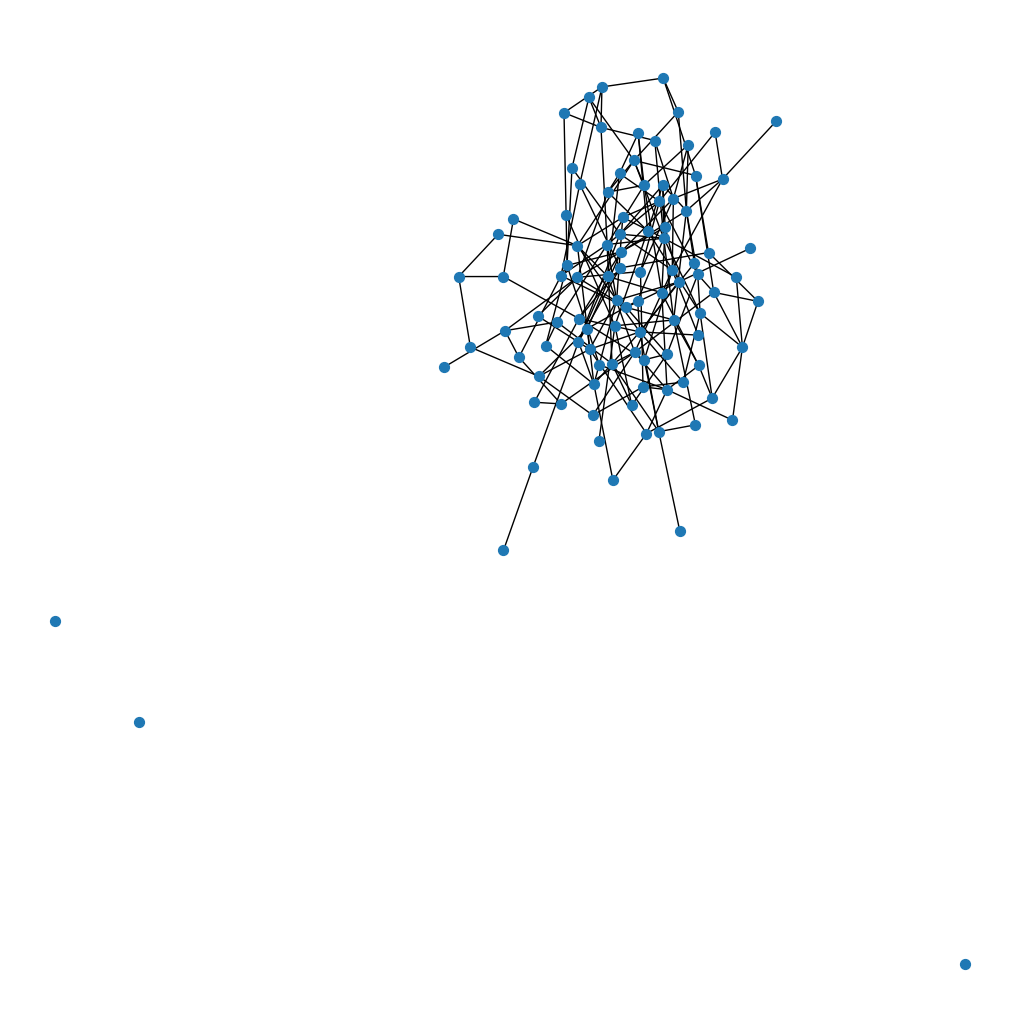

In [3]:
# Create the graph from the adjacency matrix
G = nx.from_numpy_array(adj_matrix)

# Plot the graph
plt.figure(figsize=(10, 10))
nx.draw(G, node_size=50, with_labels=False)
plt.show()

Depth-First Search (DFS) to Find Connected Components

In [4]:
def dfs(graph, start, visited):
    visited.add(start)
    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)
    return visited

# Find connected components
visited = set()
components = []
for vertex in adj_list.keys():
    if vertex not in visited:
        component = dfs(adj_list, vertex, set())
        components.append(component)
        visited.update(component)

# Display results
print(f"Number of connected components: {len(components)}")
print("Components (First 3):", components[:3])

Number of connected components: 4
Components (First 3): [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}, {48}, {62}]


Breadth-First Search (BFS) for Shortest Path

In [5]:
def bfs_shortest_path(graph, start, goal):
    visited = set()
    queue = deque([[start]])
    if start == goal:
        return [start]
    while queue:
        path = queue.popleft()
        node = path[-1]
        if node not in visited:
            for neighbor in graph[node]:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)
                if neighbor == goal:
                    return new_path
            visited.add(node)
    return None

# Define start and goal nodes
start, goal = random.sample(range(num_vertices), 2)
shortest_path = bfs_shortest_path(adj_list, start, goal)

print(f"Shortest path between {start} and {goal}: {shortest_path}")

Shortest path between 82 and 50: [82, 51, 58, 50]


**Adjacency Matrix vs. Adjacency List:** The adjacency matrix is easy to use for dense graphs but requires more memory, especially with 100 vertices. The adjacency list is more memory-efficient, making it preferable for sparse graphs.

**DFS for Connected Components:** DFS works well in identifying connected clusters, ideal for analyzing components in undirected graphs.

**BFS for Shortest Path:** BFS is suitable for unweighted graphs and quickly finds the shortest path, as demonstrated above.